# Kmean all images
Apply the kmean filter with k=3 to see the results on all images

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [7]:
#Target class number
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3 #Trying to find BG / general contours / bacteria
attempts = 10

In [8]:
from cv2 import Mat

def execute_kmeans(image: Mat) -> Mat:
    image_as_array = np.float32(image.reshape((-1,3)))

    _, label, center = cv2.kmeans(image_as_array, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((image.shape))

    return result_image

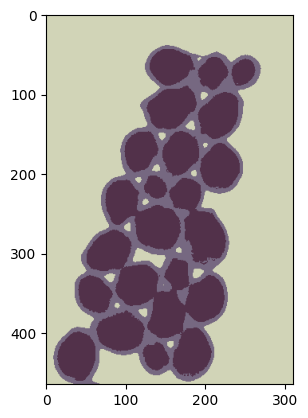

In [9]:
image_name = f"../dataset/png/Candida.albicans_0004.png"
original_image = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)
kmean_image = execute_kmeans(original_image)
plt.imshow(kmean_image)

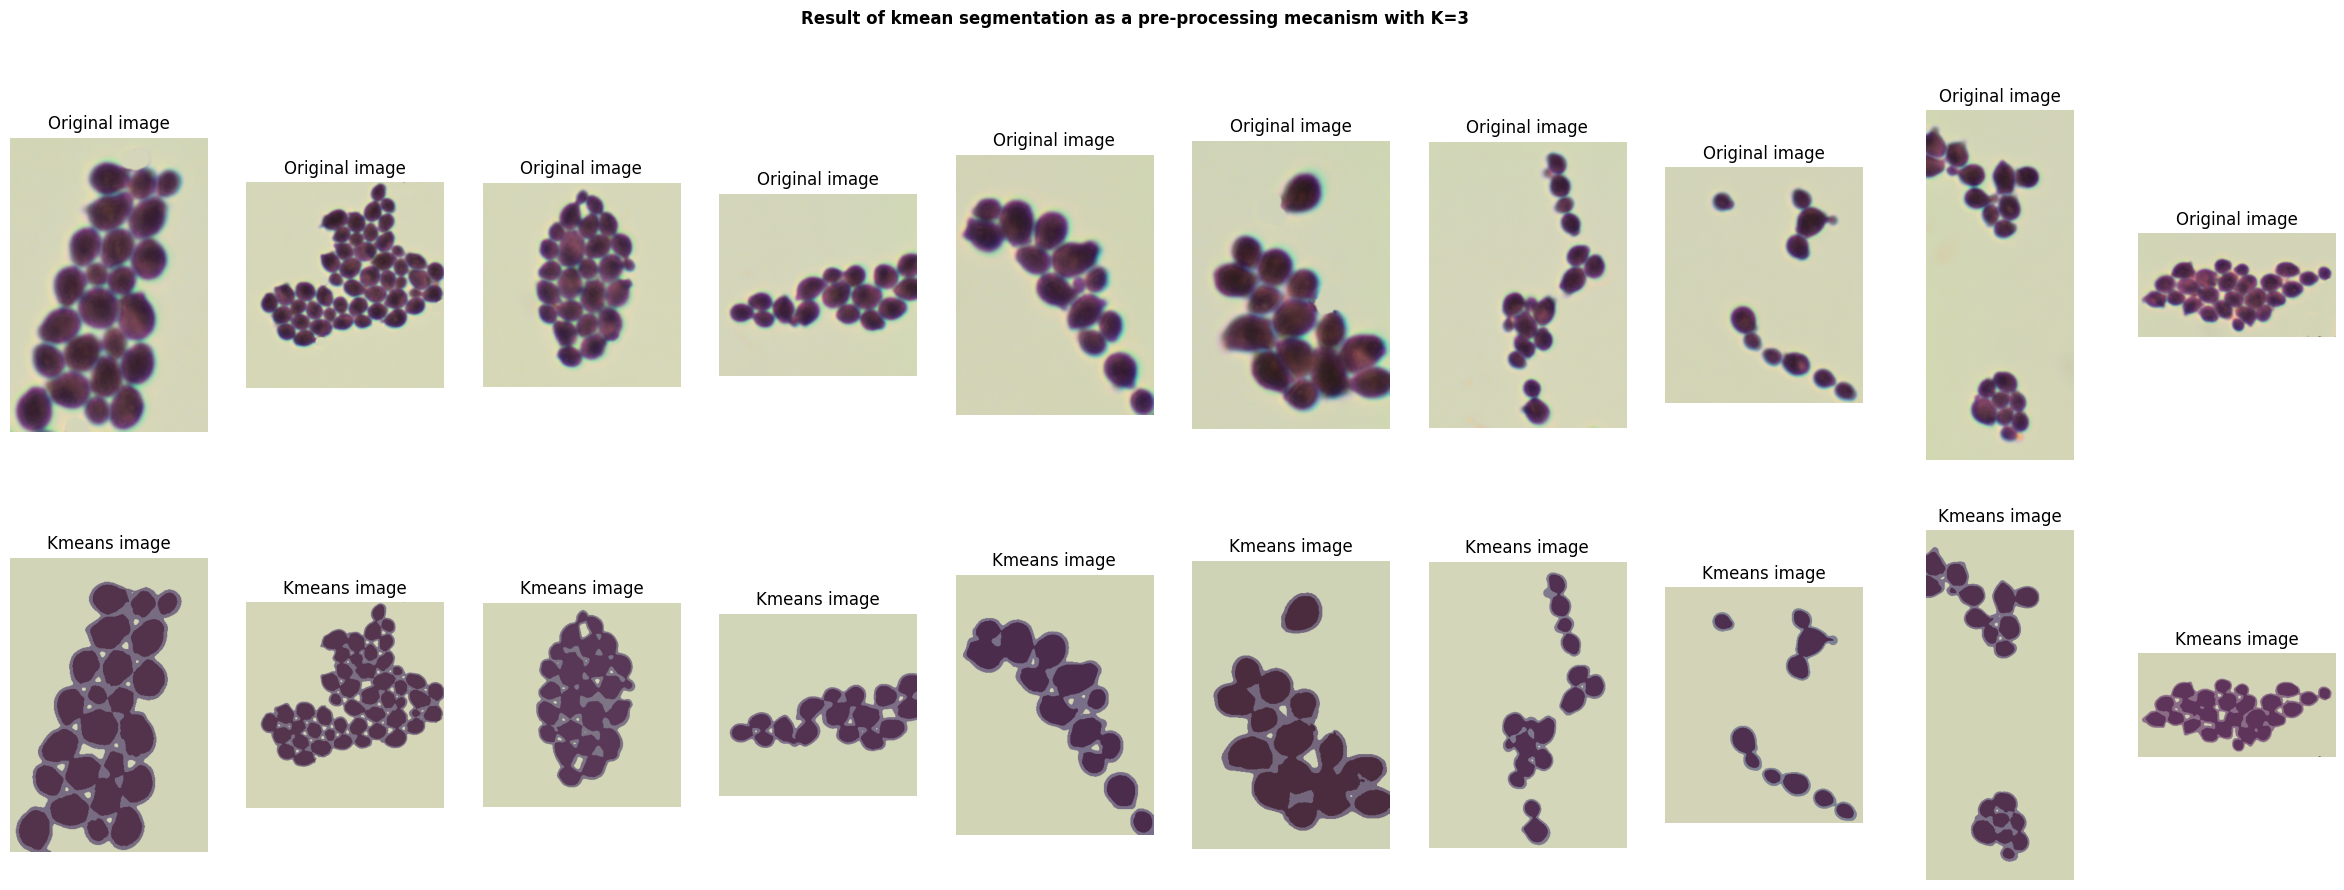

In [10]:
from os import listdir
FOLDER_PATH = "../dataset/png"

# Compute all images
kmean_images: list[tuple] = []
for file_name in listdir(FOLDER_PATH):
    image_name = f"{FOLDER_PATH}/{file_name}"
    original_image = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)
    original_image = cv2.GaussianBlur(original_image, (5,5), 0)
    kmean_image = execute_kmeans(original_image)
    kmean_images.append((original_image, kmean_image))

#Display all kmeansed iamges
fig, ax = plt.subplots(2, len(kmean_images), figsize=(30, 10))
fig.suptitle(f'Result of kmean segmentation as a pre-processing mecanism with K={K}', fontweight='bold')

for i, (o_image, k_image) in enumerate(kmean_images):
    ax[0][i].imshow(o_image)
    ax[0][i].set_title('Original image')
    ax[0][i].set_axis_off()

    ax[1][i].imshow(k_image)
    ax[1][i].set_title('Kmeans image')
    ax[1][i].set_axis_off()

#plt.savefig("./out/kmeans.png")